In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


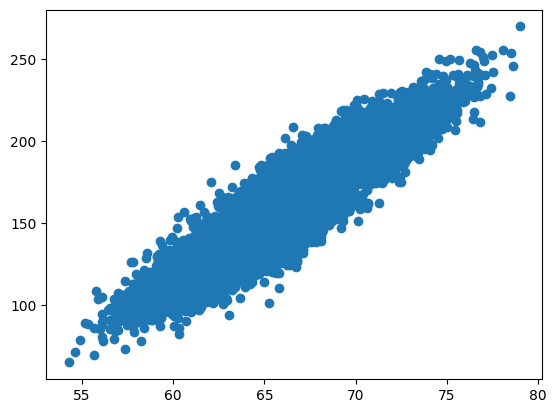

In [3]:
plt.scatter(df.Height, df.Weight)
plt.show()

In [4]:
sam_df = df.sample(100)

In [5]:
sam_df.head()

,Gender,Height,Weight
979,Male,68.537902,191.822914
6777,Female,63.892262,148.971114
7387,Female,61.435332,125.978767
4182,Male,68.041528,185.183339
7470,Female,61.387772,123.018546


In [6]:
sam_df.shape

(100, 3)

In [7]:
sam_df.drop(columns = ['Gender'], inplace = True)

<Axes: >

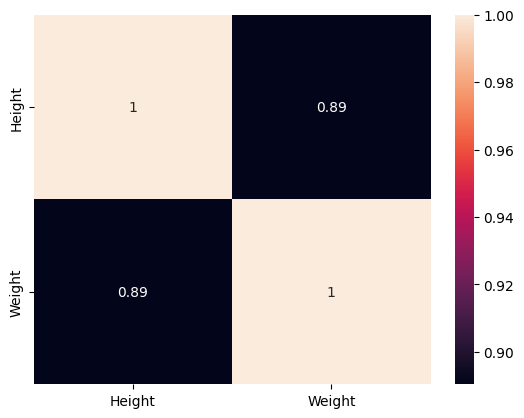

In [8]:
sns.heatmap(sam_df.corr(), annot=True)

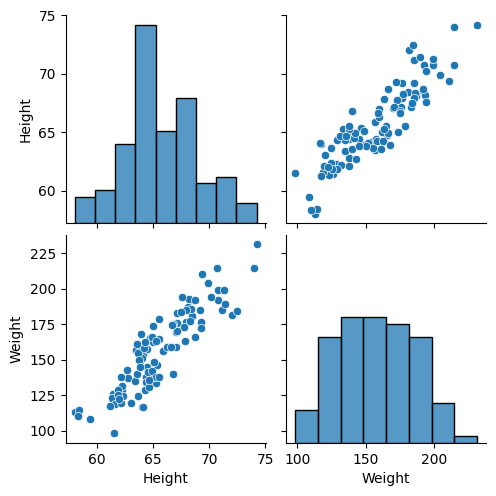

In [9]:
sns.pairplot(data = sam_df)

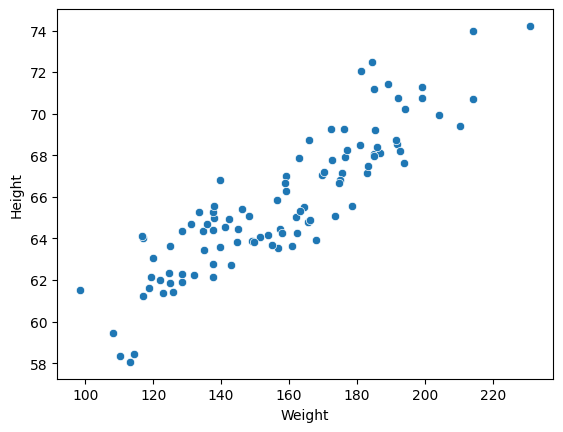

In [10]:
sns.scatterplot(x=sam_df.Weight, y=sam_df.Height)
plt.show()

In [11]:
#Independent and Dependent
X = sam_df[['Weight']]
y = sam_df['Height']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

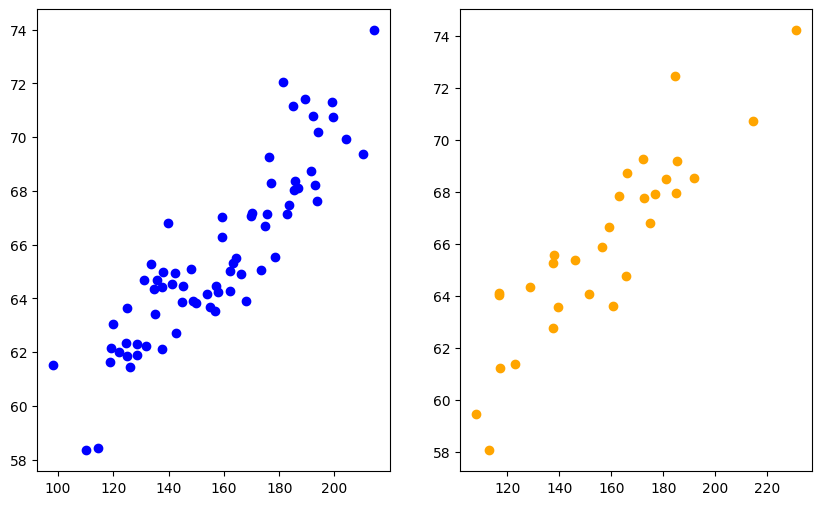

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, color='blue')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, color='orange')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

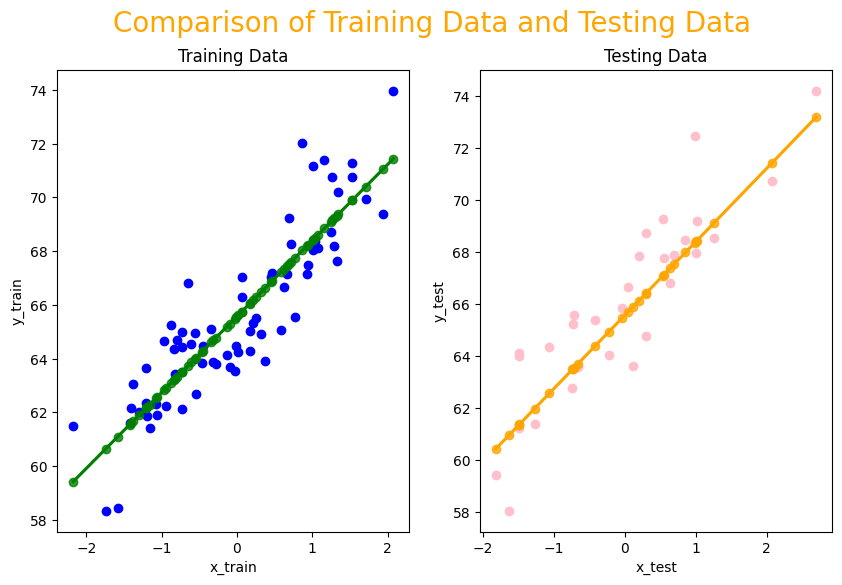

In [32]:
plt.figure(figsize=(10,6))
plt.suptitle('Comparison of Training Data and Testing Data', fontsize=20, color='orange')
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, color='blue')
sns.regplot(x=x_train, y=y_pred_train, color='green')
plt.title('Training Data')
plt.xlabel('x_train')
plt.ylabel('y_train')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, color='pink')
sns.regplot(x=x_test, y=y_pred_test, color='orange')
plt.title('Testing Data')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show()

In [21]:
model.coef_, model.intercept_

(array([2.82623308]), 65.57492514035806)

In [23]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

print(f'The Mean Squared Error for the model is {round(mean_squared_error(y_pred_train, x_train), 2)}')
print(f'The Root Mean Squared Error for the model is {round(root_mean_squared_error(y_pred_test, y_test),2)}')
print(f'The Mean Absolute Error for the model is {round(mean_absolute_error(y_pred_test, y_test),2)}')
print(f'The r2_score for the model is {round(r2_score(y_pred_test, y_test),2)}')

The Mean Squared Error for the model is 4303.41
The Root Mean Squared Error for the model is 1.63
The Mean Absolute Error for the model is 1.32
The r2_score for the model is 0.72


In [24]:
model.predict(scaler.fit_transform([[250]]))

array([65.57492514])

In [25]:
import statsmodels.api as sm

In [26]:
new_model = sm.OLS(y_train, x_train).fit()

In [27]:
prediction = new_model.predict(x_test)
prediction

array([ 1.52619794,  0.33020013,  2.84352942,  0.86042456,  2.41810467,
        0.83042828, -1.18800966, -2.03258541, -2.08360715,  3.54844218,
       -0.63171699, -4.22215929, -2.07068084,  7.62446168,  1.8085053 ,
       -3.58631703,  2.78351712, -1.85794726,  5.87524265, -0.12142585,
        1.56231066,  0.14106702,  0.56197719,  2.86771953, -4.23035489,
       -3.00427437, -4.61890683, -5.13210784,  1.97325012, -4.19547134])

In [28]:
print(new_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.013
Method:                 Least Squares   F-statistic:                             0.1281
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                       0.721
Time:                        11:35:50   Log-Likelihood:                         -392.17
No. Observations:                  70   AIC:                                      786.3
Df Residuals:                      69   BIC:                                      788.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------